In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
xls = pd.ExcelFile('data/ProblemCData.xlsx')
energy_data = pd.read_excel(xls, 'seseds')
variables = pd.read_excel(xls, 'msncodes')
variable_columns = energy_data['MSN'].unique()

In [99]:
AZ_data = energy_data[energy_data['StateCode'] == 'AZ']
CA_data = energy_data[energy_data['StateCode'] == 'CA']
NM_data = energy_data[energy_data['StateCode'] == 'NM']
TX_data = energy_data[energy_data['StateCode'] == 'TX']

In [100]:
data = {}
data['AZ'] = AZ_data.pivot(index='Year', columns='MSN', values='Data')
data['TX'] = TX_data.pivot(index='Year', columns='MSN', values='Data')
data['CA'] = CA_data.pivot(index='Year', columns='MSN', values='Data')
data['NM'] = NM_data.pivot(index='Year', columns='MSN', values='Data')
data['AZ'].head()

MSN,ABICB,ABICP,ARICB,ARICD,ARICP,ARICV,ARTCB,ARTCD,ARTCP,ARTCV,...,WWTXB,WWTXD,WWTXV,WXICB,WXICD,WXICP,WXICV,WYEGB,WYEGP,WYTCB
Year,,,,,,,,,,,,,,,,,,,,,
1960,0.0,0.0,5726.26021,NaN,862.90841,NaN,5726.26021,NaN,862.90841,NaN,...,3819.24697,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1961,0.0,0.0,6274.82747,NaN,945.57376,NaN,6274.82747,NaN,945.57376,NaN,...,3715.21210,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1962,0.0,0.0,5741.44510,NaN,865.19667,NaN,5741.44510,NaN,865.19667,NaN,...,3628.19694,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1963,0.0,0.0,8193.88866,NaN,1234.76321,NaN,8193.88866,NaN,1234.76321,NaN,...,3937.01824,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0
1964,0.0,0.0,7749.17493,NaN,1167.74788,NaN,7749.17493,NaN,1167.74788,NaN,...,4057.80989,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0


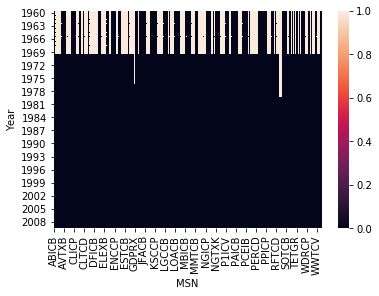

In [101]:
sns.heatmap(data['AZ'].isnull())
plt.show()

In [110]:
xlsx = pd.ExcelFile('data/table5.xlsx')
state_CO2_data = pd.read_excel(xlsx, 'Sheet1', skiprows=5, skipfooter=2)
state_CO2_data = state_CO2_data.transpose()
state_CO2_data.columns = state_CO2_data.loc['State']
state_CO2_data = state_CO2_data.drop('State')
state_CO2_data

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Average all states
2000,31.9424,70.5695,16.6762,23.7751,11.2516,19.5607,12.5897,21.1897,7.50682,14.9391,...,22.4479,31.3967,29.0277,11.0672,17.3199,14.0733,63.5855,20.1045,127.855,20.7294
2001,29.8967,68.4544,16.7695,23.3549,11.2206,20.9533,12.1516,20.2055,7.09268,14.5851,...,22.0353,30.5581,27.582,10.8045,16.7787,13.328,58.2238,19.5954,128.135,20.1417
2002,30.9005,67.8467,16.2635,22.6851,11.0706,20.2313,11.5863,19.7073,7.28151,14.4872,...,21.7163,30.504,26.7758,10.3386,16.3717,12.0923,65.181,19.6833,124.292,20.089
2003,30.9352,67.3159,16.2633,22.7805,10.6046,19.9149,12.2724,20.1858,6.89355,14.4625,...,21.2118,29.7556,26.69,10.6829,16.757,12.3131,63.0025,19.1942,127.261,20.0907
2004,31.2549,70.9376,17.0923,22.7055,11.0279,20.3633,12.7569,19.948,7.04315,14.7731,...,21.3203,29.0072,27.2475,11.3431,17.0278,12.4723,61.3138,19.5112,125.547,20.2587
2005,31.351,72.0333,16.5587,21.6402,10.8668,20.5897,12.5664,20.5806,6.91167,14.6087,...,21.2531,26.8782,27.2894,10.9652,17.0463,12.5517,62.3179,19.9897,123.055,20.1306
2006,31.4795,67.79,16.5741,21.9919,11.0353,20.4172,11.6643,18.91,5.56951,14.264,...,21.2906,26.686,27.0643,10.7282,15.9795,11.9981,62.1879,18.4778,122.6,19.705
2007,31.5356,64.7697,16.5177,22.2476,11.1034,20.6061,11.4109,19.6025,5.88239,13.9826,...,20.8733,26.0167,27.0793,10.4521,16.5014,12.6475,63.184,18.676,124.316,19.8362
2008,29.5817,57.3893,16.2838,22.3396,10.5366,19.8449,10.6213,18.3046,5.31389,12.8756,...,19.6146,24.0655,26.0902,9.52438,14.9005,12.0135,60.6848,18.647,122.594,19.0092
2009,25.2295,54.0561,14.7273,21.252,10.0636,18.6885,10.0866,13.4313,5.36212,12.0231,...,16.2488,22.1799,23.7831,9.88148,13.3331,11.4975,48.4487,16.9792,113.899,17.4859


In [116]:
import functools
functools.reduce?

In [148]:
descriptions = variables['Description'].str.lower().str.replace('.', '').str.strip()
def search_vars(*args):
    masks = [descriptions.str.contains(arg.lower()) for arg in args]
    mask = functools.reduce(lambda x, y: x & y, masks)
    return list(set(descriptions[mask]))
search_vars('waste')

['wood and waste consumed by the industrial sector',
 'wood and waste consumed in the industrial sector at a cost',
 'waste consumed by the industrial sector',
 'wood and waste expenditures in the industrial sector',
 'wood and waste total expenditures',
 'wood and waste average price, all end-use sectors',
 'wood and waste consumed in the commercial sector at a cost',
 'wood and waste total end-use expenditures',
 'wood and waste average price, all sectors',
 'wood and waste consumed by the electric power sector',
 'wood and waste price in the commercial sector',
 'wood and waste expenditures in the commercial sector',
 'wood and waste total end-use consumption',
 'waste consumed by the commercial sector',
 'wood and waste expenditures in the electric power sector',
 'waste consumed by the electric power sector',
 'wood and waste consumed by the commercial sector',
 'wood and waste consumed in the commercial sector at no cost',
 'wood and waste price in the industrial sector',
 'wood 

In [135]:
import re
all_sources = set()
all_sectors = set()
for description in descriptions:
    m = re.match('(.*) consumed by the (.*)', description)
    if m and 'factor' not in description:
        all_sources.add(m.group(1))
        all_sectors.add(m.group(2))

In [136]:
all_sectors

{'commercial sector',
 "commercial sector excluding the sector's share of electrical system energy losses",
 'electric power sector',
 'electric power sector (excluding supplemental gaseous fuels)  (code used in seds 2006)',
 'electric power sector (including supplemental gaseous fuels)',
 'end-use sectors',
 'industrial sector',
 'industrial sector excluding refinery fuel',
 'industrial sector excluding refinery fuel (including supplemental gaseous fuels)',
 "industrial sector excluding the sector's share of electrical system energy losses",
 'residential and commercial sectors',
 'residential sector',
 "residential sector excluding the sector's share of electrical system energy losses",
 'transportation sector',
 'transportation sector  (code used in seds 2006)',
 "transportation sector excluding the sector's share of electrical system energy losses"}

In [ ]:
relevant_sectors = [
    'commercial',
    'electric power',
    'industrial',
    'residential',
    'transportation'
]
# note that end-use sectors is relevant_sectors except "electric power"

In [138]:
all_sources

{'all petroleum products',
 'asphalt and road oil',
 'asphalt and road oil, kerosene, lubricants, and "other petroleum products"',
 'aviation gasoline',
 'aviation gasoline blending components',
 'coal',
 'crude oil',
 'distillate fuel oil',
 'distillate fuel oil and kerosene-type jet fuel',
 'fuel ethanol, excluding denaturant,',
 'fuel ethanol, including denaturant,',
 'jet fuel',
 'kerosene',
 'kerosene-type jet fuel',
 'lpg',
 'lubricants',
 'miscellaneous petroleum products',
 'motor gasoline',
 'motor gasoline blending components',
 'naphtha-type jet fuel',
 'natural gas',
 'natural gasoline',
 'other petroleum products',
 'pentanes plus',
 'petrochemical feedstocks, naphtha less than 401 degrees f,',
 'petrochemical feedstocks, other oils equal to or greater than 401 degrees f,',
 'petrochemical feedstocks, still gas,',
 'petroleum coke',
 'plant condensate',
 'residual fuel oil',
 'solar thermal energy',
 'special naphthas',
 'still gas',
 'supplemental gaseous fuels',
 'total 

In [ ]:
# https://www.eia.gov/state/seds/sep_fuel/notes/use_petrol.pdf
petroleum_energy = [
    "aviation gasoline blending components", # only has statistics for sector="transportation", naturally
    "coal", # note that we are coal consumed at coke plants. That gets counted in source="petroleum coke"
    "jet fuel total", # includes both "kerosene-type jet fuel" and "naphtha-type jet fuel"
    "kerosene",
    "lpg", # stands for "liquified petroleum gas"
    "motor gasoline",
    "residual fuel oil",
    "motor gasoline blending components",
    "still gas",
    "petroleum coke"
]
petrolem_other = [
    "asphalt and road oil",
    "crude oil",
    "lubricants",
    "petrochemical feedstocks, naphtha less than 401 degrees f,",
    "petrochemical feedstocks, other oils equal to or greater than 401 degrees f,",
    "waxes"
]

# https://www.eia.gov/state/seds/sep_fuel/notes/use_renew.pdf
renewable_energy = [
    "hydroelectricity",

    "geothermal energy",
    # note that geothermal variables are 'different'
    # Direct use of geothermal energy and heat pumps in the commercial sector.
    # Electricity produced from geothermal energy by the electric power sector.
    # Direct use of geothermal energy and heat pumps in the industrial sector.
    # Direct use of geothermal energy and heat pumps in the residential sector.
    # Geothermal energy total consumption.
    # Geothermal total end-use consumption.
    # Geothermal energy and hydroelectricity consumed in the commercial sector.
    # Geothermal and solar energy consumed in the residential sector.

    "photovoltaic and solar thermal energy",
    # Electricity produced from photovoltaic and solar thermal energy by the electric power sector.
    # Solar thermal energy consumed by the residential and commercial sectors.
    # Photovoltaic and solar thermal energy total consumption.
    # Photovoltaic and solar thermal energy total end-use consumption.

    "wind",
    # Electricity produced from wind energy by the electric power sector.
    # Electricity produced from wind energy.

    "wood",
    
    "waste",
    # consider "wood and waste" instead
    
    # biomass = WWTCB + EMTCB + EMLCB,
    # which we are measuring individually
]